<h2>Basic Equations</h2>

$$
\begin{align}
-(1-Z \nabla^2_{\bot}) \partial_t \phi + E \partial_y \nabla^2_{\bot} \phi + R \partial_y \phi + Q [\phi, \nabla^2_{\bot} \phi] = 0,
\end{align}
$$

Some of the terms were re-labeled to simplify the math. The terms are defined as, 
$$
\begin{align}
    Z &= \frac{1 + \tau}{2} \frac{m_e}{m_i}, \\
    E &= \frac{\tau (1+\tau)(1+\eta_e) m_e}{4 m_i}, \\
    R &= \frac{1 + \eta_e}{2}, \\
    Q &= \frac{m_e (1 + \tau)^2}{m_i} \frac{r_n}{4 \rho_i}.
\end{align}
$$

Let's define the following as well,
$$
\begin{align}
    \xi = \nabla^2_{\bot} \phi.
\end{align}
$$

We can rewrite the equation now as, 
$$
\begin{align}
  \partial_t (\phi - Z \xi) = E \partial_y \xi + R \partial_y \phi + Q [\phi,\xi].
\end{align}
$$

Let's now define the following terms, 
$$ 
\begin{align}
  \phi_k &= \Sigma_k \phi_0 \exp{i k \vec{x}}, \\
  (\nabla^2 \phi)_k &= \xi_k = - k^2 \phi_k, \\
  k^2 &= k_x^2 + k_y^2.
\end{align}
$$

Rewriting now the H-M Ion equation in spectral space results in the following, 
$$
\begin{align}
    \partial_t \phi_k = \frac{1}{1 + Z k^2} (E \partial_y \xi + R \partial_y \phi + Q [\phi,\xi])_k.
\end{align}
$$

We can now use a pseudo-spectral approach with a 4th-order Runge-Kutta scheme to solve for $\phi_k$ and $\phi$.  

<h2>Initial Conditions</h2>

In [1]:
import numpy as np
import math as mt
import scipy.fftpack as sf
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
nx=ny=256
mx=16
my=8
lx=2*np.pi/0.15; ly=lx
dx=lx/nx; dy=ly/ny
nt=5000; isav=25; dt=2e-2
kap=0.1
Z=1; E=1; R=1; Q=1
x = np.arange(nx)*dx
y = np.arange(ny)*dy
X,Y = np.meshgrid(x,y)
px=np.linspace(-mx/2,mx/2,mx)*2.*np.pi/lx
px[8]=0
px[7]=0
print(px)
py=np.arange(my)*2.*np.pi/ly
A=np.zeros((mx,my))+0.*1j
phi=np.zeros((nx,ny))+0.*1j
# had at 0.3-0.5 loop for 64 nx.
# had 0-8 for both modes

for k in range(mx):
    rand=random.uniform(0,2*np.pi)
    A[int(random.uniform(4,12)),int(random.uniform(0,8))]=random.uniform(0.08,0.15)*np.exp(1j*rand)
    
A[8,int(random.uniform(3*my/8,4*my/8))] = 0.11*np.exp(1j*random.uniform(0,2*np.pi))

rand=random.uniform(0,2*np.pi)
A[8,int(my/4)]=1.*np.exp(1j*rand)  

[-1.2  -1.04 -0.88 -0.72 -0.56 -0.4  -0.24  0.    0.    0.24  0.4   0.56
  0.72  0.88  1.04  1.2 ]


In [3]:
for i in range(nx):
    for j in range(ny):
        for m1 in range(mx):
            for m2 in range(my):
                phi[i,j]=phi[i,j]+A[m1,m2]*np.exp(1j*px[m1]*x[i]+1j*py[m2]*y[j])
phi=np.real(phi)
phi=np.transpose(phi)

## Test
# r1 = (x-lx/2)**2+(y-ly/2)**2
# phi=10*(2*np.exp(-r1/64)*np.cos(0.15*Y)+np.cos(0.3*Y))

In [4]:
phihst =np.zeros((nt//isav,nx,ny))
phifhst =np.zeros((nt//isav,nx,ny))

kx =2*np.pi/lx*np.r_[np.arange(nx/2),np.arange(-nx/2,0)]
ky =2*np.pi/ly*np.r_[np.arange(ny/2),np.arange(-ny/2,0)]

# for de-aliasing (not sure what this does. Need to research)
kxd=np.r_[np.ones(nx//3),np.zeros(nx//3+nx%3),np.ones(nx//3)]
kyd=np.r_[np.ones(ny//3),np.zeros(ny//3+ny%3),np.ones(ny//3)]

# Create meshgrid and also define kx^2 and ky^2
kx2=kx**2; ky2=ky**2
KX, KY =np.meshgrid(kx ,ky )
KX2,KY2 =np.meshgrid(kx2,ky2)
KXD,KYD =np.meshgrid(kxd,kyd)

phihst[0,:,:] = phi
phifhst[0,:,:] = np.fft.fftshift(np.real(sf.fft2(phi)))

/home/frra1220/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


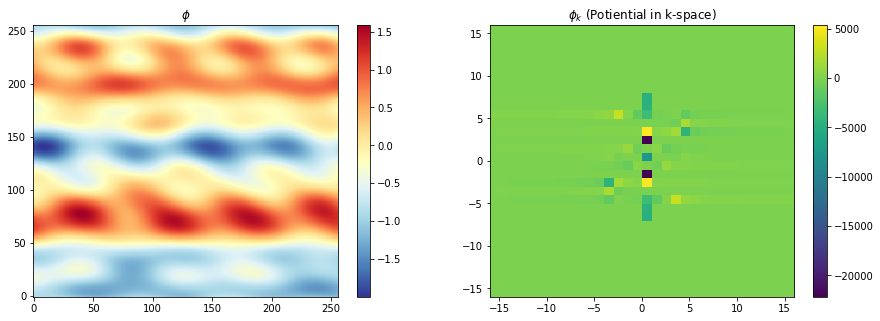

In [5]:
sizetuple = (15,5)
fig, ax = plt.subplots(ncols=2,figsize=sizetuple)

ra = 0

# can use jet color scheme for cmap as well..
im1=ax[0].imshow(phi            ,aspect='auto',origin='lower',cmap='RdYlBu_r');ax[0].axis('on');fig.colorbar(im1, ax=ax[0]);ax[0].set_title(r'$\phi$')
im2=ax[1].imshow(phifhst[ra,:,:]           ,aspect='auto',origin='lower',extent=[-128,128,-128,128],cmap='viridis');ax[1].axis('on');fig.colorbar(im2, ax=ax[1]);ax[1].set_title(r'$\phi_k \ $(Potiential in k-space)')
ax[1].set_xlim(-16,16)
ax[1].set_ylim(-16,16)

plt.show()

In [6]:
import warnings
warnings.simplefilter('error', RuntimeWarning)
def HM(nx,ny,lx,ly,nt,dt,Z,E,R,Q,mu,phi,isav):
    global KX,KY,KX2,KY2,KXD,KYD

    # Define dx and dy:
    dx=lx/nx; dy=ly/ny

    ### define grids ###
    # np.r_: concatenate any number of array slices along row (row-wise merging).
    # np.arange(start,stop,step): return evenly spaced vales within a given interval. 
    # kx = 2*pi*n/lx; ky = 2*pi*m/ly, where n and m are integers. 
    # so actually L = 41.88...
    kx =2*np.pi/lx*np.r_[np.arange(nx/2),np.arange(-nx/2,0)]
    ky =2*np.pi/ly*np.r_[np.arange(ny/2),np.arange(-ny/2,0)]

    # for de-aliasing (not sure what this does. Need to research)
    kxd=np.r_[np.ones(nx//3),np.zeros(nx//3+nx%3),np.ones(nx//3)]
    kyd=np.r_[np.ones(ny//3),np.zeros(ny//3+ny%3),np.ones(ny//3)]

    # Create meshgrid and also define kx^2 and ky^2
    kx2=kx**2; ky2=ky**2
    KX, KY =np.meshgrid(kx ,ky )
    KX2,KY2 =np.meshgrid(kx2,ky2)
    KXD,KYD =np.meshgrid(kxd,kyd)

    # Define Fourier transform of phi
    # fft2: 2-D discrete Fourier transform
    # ifft2: 2-D discrete inverse Fourier transform of real or complex sequence.

    # Allocate space to store phi, zeta, and n. In this case phi = n.
    # phi(time,x,y) etc.
    phihst =np.zeros((nt//isav,nx,ny))
    zetahst =np.zeros((nt//isav,nx,ny))

    # Allocate space for phi in fourier-space:
    phifhst =np.zeros((nt//isav,nx,ny))
    # phif[:128,:128] = np.conj(phif[128:,128:])
    
    phi=phi
    
    phif = sf.fft2(phi) # /nx
    phif = np.fft.fftshift(phif)
    # phif[:128,:] = np.conj(np.flip(phif[128:,:]))
    phifhst[0,:,:] = abs(phif)
    phif = np.fft.ifftshift(phif)

    zetaf=-(KX2+KY2)*phif    

    # Define initial condition at t=0.
    phihst[0,:,:] =phi

    zetahst[0,:,:] = np.real(sf.ifft2(zetaf))

    for it in range(1,nt):

        #---Numerical Method: 4th-order Runge-Kutta
        # time adv. in spectral space (phif). 

        # Previous method has an integrating factor method involve due to hyperviscosity term. 
        # phif=np.exp(-mu*(KX2+KY2)**2*dt)*phif
        # But in this case mu=0 and therefore there is no hyperviscosity term involved. 

        gw1 = adv(phif)
        gw2 = adv(phif+0.5*dt*gw1)
        gw3 = adv(phif+0.5*dt*gw2)
        gw4 = adv(phif+dt*gw3)

        phif=phif+dt*(gw1+2*gw2+2*gw3+gw4)/6

        # Stores values every it%isav==0
        if(it%isav==0):
            # In previous code. Seems to be a boundary condition in spectral space. 
            phif[0,0]=0
            phif = np.fft.fftshift(phif)
            # Maybe need to comment this out below? Try tomorrow.
            # phif[:128,:] = np.conj(np.flip(phif[128:,:]))
            phifhst[it//isav,:,:] = abs(phif)
            phif = np.fft.ifftshift(phif)

            # Reality condition (Needs to be enforced):
            # if needed the size can be checked using np.shape(phif)
            # Not sure if this is right...
            # phif[128:,128:] = -np.conj(phif[:128,:128])


            zetaf = -(KX2+KY2)*phif

            # Transorm phi and zeta into real space using IFFT.
            phi=np.real(sf.ifft2(phif))
            zeta=np.real(sf.ifft2(zetaf))

            # Record phi and zeta values in allocated phi and zeta array at instance in time.
            phihst[it//isav,:,:]=phi
            zetahst[it//isav,:,:]=zeta
	    
    return locals()

In [7]:
def adv(phif):
    phif[0,0]=0
    phif = phif # /nx

    zetaf=-(KX2+KY2)*phif
    kconstf=1/(1+Z*(KX2+KY2))

    # Define spatial derivatives \partial_x phi, etc. for Poisson bracket.
    # This was written originally for Hasegawa-Wakatani.
    phixf = 1j*KX*phif;  phix =np.real(sf.ifft2(phixf *KXD*KYD))
    phiyf = 1j*KY*phif;  phiy =np.real(sf.ifft2(phiyf *KXD*KYD))
    zetaxf= 1j*KX*zetaf; zetax=np.real(sf.ifft2(zetaxf*KXD*KYD))
    zetayf= 1j*KY*zetaf; zetay=np.real(sf.ifft2(zetayf*KXD*KYD))

    # FFT2 real-space calculation of -phix*zetay+phiy*zetax-kap*phiy
    derivative = sf.fft2(Q*(phix*zetay-phiy*zetax)+R*np.real(sf.ifft2(phiyf)+E*np.real(sf.ifft2(zetayf))))

    # Multiply by kconstf.
    advff = kconstf*(derivative)

    return advff

In [9]:
data=HM(nx,ny,lx,ly,1000,dt,Z,E,R,Q,0,phi,isav) # mu=1e-4 for the previous code. 
locals().update(data)

/home/frra1220/.local/lib/python3.5/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


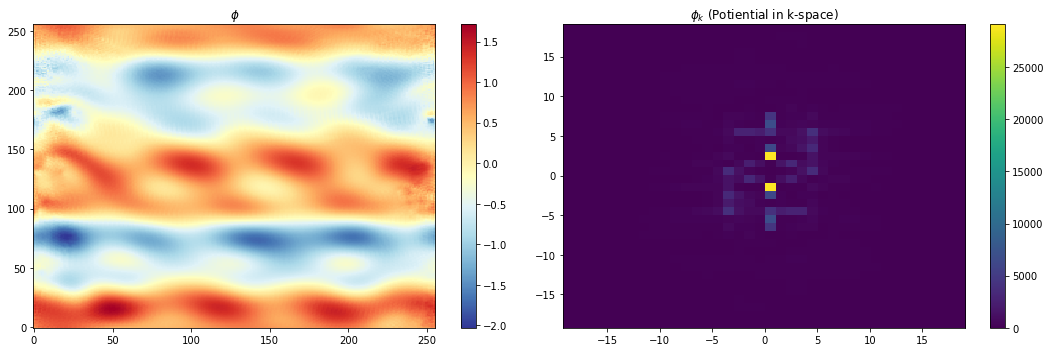

In [11]:
sizetuple = (15,5)
fig, ax = plt.subplots(ncols=2, figsize=sizetuple)

ra = 29

# can use jet color scheme for cmap as well..
im1=ax[0].imshow(phihst[ra,:,:]            ,aspect='auto',origin='lower',cmap='RdYlBu_r');ax[0].axis('on');fig.colorbar(im1, ax=ax[0]);ax[0].set_title(r'$\phi$')
im2=ax[1].imshow(phifhst[ra,:,:]           ,aspect='auto',origin='lower',extent=[-128,128,-128,128],cmap='viridis');ax[1].axis('on');fig.colorbar(im2, ax=ax[1]);ax[1].set_title(r'$\phi_k \ $(Potiential in k-space)')
ax[1].set_xlim(-19.2,19.05)
ax[1].set_ylim(-19.2,19.05)

plt.tight_layout()
plt.show()

In [10]:
print(1-KX2-KY2)

[[1.     0.9775 0.91   ... 0.7975 0.91   0.9775]
 [0.9775 0.955  0.8875 ... 0.775  0.8875 0.955 ]
 [0.91   0.8875 0.82   ... 0.7075 0.82   0.8875]
 ...
 [0.7975 0.775  0.7075 ... 0.595  0.7075 0.775 ]
 [0.91   0.8875 0.82   ... 0.7075 0.82   0.8875]
 [0.9775 0.955  0.8875 ... 0.775  0.8875 0.955 ]]


In [11]:
print(1+KX2+KY2)

[[1.     1.0225 1.09   ... 1.2025 1.09   1.0225]
 [1.0225 1.045  1.1125 ... 1.225  1.1125 1.045 ]
 [1.09   1.1125 1.18   ... 1.2925 1.18   1.1125]
 ...
 [1.2025 1.225  1.2925 ... 1.405  1.2925 1.225 ]
 [1.09   1.1125 1.18   ... 1.2925 1.18   1.1125]
 [1.0225 1.045  1.1125 ... 1.225  1.1125 1.045 ]]
